
<center>
<h4>Universidad Nacional de Córdoba - Facultad de Matemática, Astronomía, Física y Computación</h4>
<h3>Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones</h3>
 <h2>Mentoría: Clasificación de Tumoresferas </h2>
</center>



<a name="exploratory_data_analysis"></a>
## **Práctico de Análisis Exploratorio y Curación**
  



Importamos las librerías necesarias:

In [1]:
! pip install SQLAlchemy

In [2]:
import numpy as np
import pandas as pd
from sqlalchemy import create_engine, text

### Agrupaciones:

### SQL

Vamos a explorar los datos por medio de algunas consultas (queries) al archivo original (con el que trabajaron en el TP1):

 * Cargar el archivo *'data/raw/fiji_datos_0al7mo_labels.csv'* a SQLite.
 * Realizar las siguientes consultas:

    1) Verificar la cantidad de datos cargados (les debería dar 1018).
  
    2) Listar las primeras 7 líneas con las columnas *'Area'*, *'Round'* con alias *'redondez'*, *Diameter* con alias *'diametro'*, *n_diam* con alias  *poblacion_celular* y *esferoide*.
     
     Realizar la misma consulta pero filtrando por los días 3 y 5.
  
    3) Consultar los distintos días y aparte las etiquetas presentes. Contar cuántas filas hay por día y luego consultar cuantas son *esferoide = 'si'*.   
    
     Probar con GROUP BY de dos columnas si pueden contabilizar 'si' y 'no' por día.
    
    4 ) En algún día en particular (a partir del 3er día), consultar cuántos datos:
        
    * Son esferoides "si" y "no".        

    * Tienen su diámetro entre 50 $\mu$m y 200$\mu$ m.




#### Usando SQL en Python:

#### Cargar el archivo 'data/raw/fiji_datos_0al7mo_labels.csv' a SQLite.

In [3]:
# Para conectarse con sqlite:
engine = create_engine('sqlite:///fiji_datos.sqlite3', echo=True)

# Levantamos el archivo
url = 'https://raw.githubusercontent.com/luciabarg/datos_tumoresferas/main/data/raw/fiji_datos_0al7mo_labels.csv'
fiji_datos = pd.read_csv(url)

fiji_datos.to_sql('fiji_datos', con=engine, if_exists="replace")


2023-07-14 09:49:22,342 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:22,344 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("fiji_datos")
2023-07-14 09:49:22,347 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-07-14 09:49:22,351 INFO sqlalchemy.engine.Engine ROLLBACK
2023-07-14 09:49:22,359 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:22,365 INFO sqlalchemy.engine.Engine PRAGMA main.table_info("fiji_datos")
2023-07-14 09:49:22,367 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-07-14 09:49:22,380 INFO sqlalchemy.engine.Engine ROLLBACK
2023-07-14 09:49:22,389 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:22,406 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_master WHERE type='table' AND name NOT LIKE 'sqlite~_%' ESCAPE '~' ORDER BY name
2023-07-14 09:49:22,408 INFO sqlalchemy.engine.Engine [raw sql] ()
2023-07-14 09:49:22,415 INFO sqlalchemy.engine.Engine SELECT name FROM sqlite_temp_master WHERE type='table' AND name N

1018

#### Realizar las siguientes consultas

##### $1.$ Verificar la cantidad de datos cargados

In [4]:
#Forma que les mostraron en la clase teórica:
query1 = "SELECT count(*) FROM fiji_datos;"

with engine.connect() as con:
    print(query1)
    rs = con.execute(text(query1))
    df_rs = pd.DataFrame(rs.fetchall())
    
df_rs

SELECT count(*) FROM fiji_datos;
2023-07-14 09:49:23,084 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:23,085 INFO sqlalchemy.engine.Engine SELECT count(*) FROM fiji_datos;
2023-07-14 09:49:23,086 INFO sqlalchemy.engine.Engine [generated in 0.00227s] ()
2023-07-14 09:49:23,090 INFO sqlalchemy.engine.Engine ROLLBACK


,count(*)
0,1018


In [5]:
# Otra forma alternativa de usar sqlalchemy en Python

query1 = " SELECT count(*) FROM fiji_datos; "
with engine.connect() as con:
  query_result1 = pd.read_sql_query(text(query1), con)

query_result1

2023-07-14 09:49:23,129 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:23,136 INFO sqlalchemy.engine.Engine  SELECT count(*) FROM fiji_datos; 
2023-07-14 09:49:23,138 INFO sqlalchemy.engine.Engine [generated in 0.01036s] ()
2023-07-14 09:49:23,141 INFO sqlalchemy.engine.Engine ROLLBACK


,count(*)
0,1018


##### También pueden usar la versión [**gráfica online**](https://sqliteonline.com/) de SQLite ([SQLite instructivo](https://drive.google.com/drive/folders/1iW5OaNaNDafU4e4m87xID7HcEbvb1W0V?usp=drive_link) )



Extras que podrían ayudar:

* Documentación [*pandas.DataFrame.to_sql*](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_sql.html) y [*pandas.read_sql_query*](https://pandas.pydata.org/docs/reference/api/pandas.read_sql_query.html).

* [Recursos SQL](https://drive.google.com/drive/folders/1EDSgMGbrRjNZX7m-GXunkQjNXUxY1NSn?usp=drive_link).
    
* Presentación en [MeTCamp](https://docs.google.com/presentation/d/1URSQt1sJ8Th8Y4J62zBv9x3I1lV0rckT/edit?usp=sharing&ouid=107018266094379471830&rtpof=true&sd=true).

* Súper súper buenas prácticas en [este repositorio](https://github.com/daianadte/wids-cba-2023).

##### $2.$ Listar las primeras 7 líneas con las columnas 'Area', 'Round' con alias 'redondez', Diameter con alias 'diametro', n_diam con alias poblacion_celular y esferoide. Realizar la misma consulta pero filtrando por los días 3 y 5.

In [6]:
query2 = "SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide FROM fiji_datos LIMIT 7;"
with engine.connect() as con:
  query_result2 = pd.read_sql_query(text(query2), con)

query_result2

2023-07-14 09:49:23,176 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:23,178 INFO sqlalchemy.engine.Engine SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide FROM fiji_datos LIMIT 7;
2023-07-14 09:49:23,184 INFO sqlalchemy.engine.Engine [generated in 0.00795s] ()
2023-07-14 09:49:23,188 INFO sqlalchemy.engine.Engine ROLLBACK


,Area,redondez,diametro,poblacion_celular,Esferoide
0,324.4440,0.9387,20.95640,1.491357,si
1,497.5115,0.9546,26.00200,2.848733,si
2,282.9078,0.9620,19.38970,1.181258,si
3,500.7421,0.9730,25.88475,2.810370,si
4,492.8964,0.9817,25.33985,2.636596,si
5,406.1319,0.9533,23.27125,2.042164,si
6,333.6742,0.9496,20.80470,1.459204,si


Consulta filtrando por los días 3 y 5.

In [7]:
query3 = "SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide FROM fiji_datos WHERE dia IN (3, 5) LIMIT 7;"
with engine.connect() as con:
  query_result3 = pd.read_sql_query(text(query3), con)

query_result3

2023-07-14 09:49:23,226 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:23,230 INFO sqlalchemy.engine.Engine SELECT Area, Round AS redondez, Diameter AS diametro, n_diam AS poblacion_celular, esferoide FROM fiji_datos WHERE dia IN (3, 5) LIMIT 7;
2023-07-14 09:49:23,234 INFO sqlalchemy.engine.Engine [generated in 0.00819s] ()
2023-07-14 09:49:23,239 INFO sqlalchemy.engine.Engine ROLLBACK


,Area,redondez,diametro,poblacion_celular,Esferoide
0,4635.9028,0.8392,78.82640,79.368212,si
1,5901.8342,0.9533,87.74420,109.467897,si
2,11259.0826,0.9699,122.97820,301.381032,si
3,22344.1746,0.7434,173.24380,842.567345,si
4,2700.3153,0.6096,63.88875,42.257587,no
5,5002.3445,0.8306,84.09790,96.380011,si
6,14646.5914,0.5600,164.88585,726.409779,no


##### $3.$ Consultar los distintos días y aparte las etiquetas presentes. Contar cuántas filas hay por día y luego consultar cuantas son esferoide = 'si'. Probar con GROUP BY de dos columnas si pueden contabilizar 'si' y 'no' por día.


In [8]:
# Consultamos las etiquetas presentes en la columna dia
query4 = "SELECT DISTINCT dia FROM fiji_datos;"
with engine.connect() as con:
  query_result4 = pd.read_sql_query(text(query4), con)

# Contamos cuántas filas hay por día
query5 = "SELECT dia, COUNT(*) AS total FROM fiji_datos GROUP BY dia;"
with engine.connect() as con:
  query_result5 = pd.read_sql_query(text(query5), con)

# Contamos cuántas filas hay por día para esferoides = 'si'
query6 = "SELECT dia, COUNT(*) AS total FROM fiji_datos WHERE esferoide = 'si' GROUP BY dia;"
with engine.connect() as con:
  query_result6 = pd.read_sql_query(text(query6), con)

# Hacemos un group by de esferoides y dia
query7 = "SELECT dia, esferoide, COUNT(*) AS total FROM fiji_datos GROUP BY dia, esferoide;"
with engine.connect() as con:
  query_result7 = pd.read_sql_query(text(query7), con)

2023-07-14 09:49:23,273 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:23,274 INFO sqlalchemy.engine.Engine SELECT DISTINCT dia FROM fiji_datos;
2023-07-14 09:49:23,276 INFO sqlalchemy.engine.Engine [generated in 0.00253s] ()
2023-07-14 09:49:23,281 INFO sqlalchemy.engine.Engine ROLLBACK
2023-07-14 09:49:23,283 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:23,286 INFO sqlalchemy.engine.Engine SELECT dia, COUNT(*) AS total FROM fiji_datos GROUP BY dia;
2023-07-14 09:49:23,288 INFO sqlalchemy.engine.Engine [generated in 0.00457s] ()
2023-07-14 09:49:23,292 INFO sqlalchemy.engine.Engine ROLLBACK
2023-07-14 09:49:23,295 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:23,297 INFO sqlalchemy.engine.Engine SELECT dia, COUNT(*) AS total FROM fiji_datos WHERE esferoide = 'si' GROUP BY dia;
2023-07-14 09:49:23,298 INFO sqlalchemy.engine.Engine [generated in 0.00376s] ()
2023-07-14 09:49:23,303 INFO sqlalchemy.engine.Engine ROLLBACK
2023-07-14 09

###### Etiquetas presentes en la columna dia

In [9]:
query_result4

,dia
0,0
1,1
2,2
3,3
4,4
5,5
6,6
7,7


###### Filas por día

In [10]:
query_result5

,dia,total
0,0,94
1,1,342
2,2,155
3,3,43
4,4,254
5,5,52
6,6,4
7,7,74


###### Filas que hay por día para esferoides = 'si'

In [11]:
query_result6

,dia,total
0,0,74
1,1,253
2,2,70
3,3,18
4,4,48
5,5,28
6,6,2
7,7,29


###### Group by de esferoides y dia

In [12]:
query_result7

,dia,Esferoide,total
0,0,no,20
1,0,si,74
2,1,no,89
3,1,si,253
4,2,no,85
5,2,si,70
6,3,no,25
7,3,si,18
8,4,no,206
9,4,si,48


##### $4.$ En algún día en particular (a partir del 3er día), consultar cuántos datos:
   * Son esferoides "si" y "no".

   * Tienen su diámetro entre 50 $\mu$m y 200$\mu$ m.


In [13]:
# Seleccionamos el dia 4 y contamos cuantos son esferoides si y no
query8 = "SELECT dia, esferoide, COUNT(*) AS total FROM fiji_datos WHERE dia = 4 GROUP BY esferoide;"
with engine.connect() as con:
  query_result8 = pd.read_sql_query(text(query8), con)

# Seleccionamos el dia 4 y filtramos en un rango para el diámetro
query9 = "SELECT dia, Diameter, COUNT(*) AS total FROM fiji_datos WHERE dia = 4 AND Diameter BETWEEN 50 AND 200;"
with engine.connect() as con:
  query_result9 = pd.read_sql_query(text(query9), con)
#print("\nQuery 9:")
#print(query_result9)


2023-07-14 09:49:23,484 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:23,485 INFO sqlalchemy.engine.Engine SELECT dia, esferoide, COUNT(*) AS total FROM fiji_datos WHERE dia = 4 GROUP BY esferoide;
2023-07-14 09:49:23,487 INFO sqlalchemy.engine.Engine [generated in 0.00279s] ()
2023-07-14 09:49:23,491 INFO sqlalchemy.engine.Engine ROLLBACK
2023-07-14 09:49:23,494 INFO sqlalchemy.engine.Engine BEGIN (implicit)
2023-07-14 09:49:23,497 INFO sqlalchemy.engine.Engine SELECT dia, Diameter, COUNT(*) AS total FROM fiji_datos WHERE dia = 4 AND Diameter BETWEEN 50 AND 200;
2023-07-14 09:49:23,498 INFO sqlalchemy.engine.Engine [generated in 0.00465s] ()
2023-07-14 09:49:23,503 INFO sqlalchemy.engine.Engine ROLLBACK


###### Día 4 cantidad de esferoides si y no

In [14]:
query_result8

,dia,Esferoide,total
0,4,no,206
1,4,si,48


###### Día 4, filtrado para los diámetros entre 50 $\mu$m y 200$\mu$ m.

In [15]:
query_result9

,dia,Diameter,total
0,4,92.6425,80


In [16]:
#cerramos la conexión
con.close()

#### Python

Probar diferentes agrupaciones en Python.

##### Cantidad de datos por dia 

In [17]:
fiji_datos.groupby('dia').agg({'Esferoide': ['count']}).sort_values(by = 'dia')

,Esferoide
,count
dia,
0,94
1,342
2,155
3,43
4,254
5,52
6,4
7,74


In [18]:
fiji_datos['dia'].value_counts().sort_index()

0     94
1    342
2    155
3     43
4    254
5     52
6      4
7     74
Name: dia, dtype: int64

##### Agrupo por 'Esferoide' = 'no' y 'Esferoide' = 'si'

In [19]:
fiji_datos.groupby('Esferoide').size().reset_index(name='total')

,Esferoide,total
0,no,496
1,si,522


##### Agrupo por dia teniendo en cuenta 'Esferoide' = 'no' y 'Esferoide' = 'si'

In [20]:
fiji_datos.groupby(['dia', 'Esferoide']).size().reset_index(name='total')

,dia,Esferoide,total
0,0,no,20
1,0,si,74
2,1,no,89
3,1,si,253
4,2,no,85
5,2,si,70
6,3,no,25
7,3,si,18
8,4,no,206
9,4,si,48


### Análisis y Curación de Datos

1) Para empezar a trabajar la tabla, primero hay que combinar los datasets, que fueron separados por día.

Estos son los siguientes archivos a unir:

*   "fiji_datos_0al7mo_modificado_dia_0.csv"
*   "fiji_datos_0al7mo_modificado_dia_1.csv"
*   "fiji_datos_0al7mo_modificado_dia_2.csv"
*   "fiji_datos_0al7mo_modificado_dia_3.csv"
*   "fiji_datos_0al7mo_modificado_dia_4.csv"
*   "fiji_datos_0al7mo_modificado_dia_5.csv"
*   "fiji_datos_0al7mo_modificado_dia_6.csv"
*   "fiji_datos_0al7mo_modificado_dia_7a.csv"
*   "fiji_datos_0al7mo_modificado_dia_7b.csv"

Se encuentran en la carpeta: **"data/02_EyC"** de la [carpeta compartida](https://drive.google.com/drive/folders/1RqGNySwACN33Qopmw0nHmj5Yv4M78ZXi?usp=drive_link) y en este repositorio.


Probar hacerlo con Python y/o SQL (por separado, para probar!). Verificar que llegan a la misma cantidad de filas y columnas.

2) Una vez armado el dataset modificado, explorar el dataset y buscar inconsistencias, por ej si hay valores nulos, duplicados, etc, tratando de encontrar todas las inconsistencias en los datos. Decidir el orden en cuál ir arreglándolas.

3) Corregir las inconsistencias que van encontrando y sobre los datos faltantes (¡verificar primero si los hay!), determinar cuál método sería el mas adecuado para imputarlos, teniendo en cuenta lo que aprendieron sobre los datos en el práctico de *Análisis y Visualización*.

4) Una vez que recuperan el dataset original, repasando lo que les dieron en la materia de *Exploración y Curación de datos* y ya pensando en las transformaciones que puedan servirles y que les conviene realizar para la clasificación en el práctico de aprendizaje supervisado:

  * ¿Sobre cuáles columnas realizarían encoding y de qué tipo?. Elegir un método e implementarlo.

  * Tenemos muchas columnas (¡aunque siempre puede haber mas!) por lo que es posible realizar algún método de reducción de dimensionalidad.

  * Escalar y/o normalizar? Esa es la cuestión. Teniendo en cuenta lo aprendido a partir de los datos, cuál método se ajustaría a estos datos?

  Sumar tales transformaciones como columnas para sumar características al conjunto de datos y guardar el achivo modificado.

Si se traban mucho mucho en la limpieza de los datos, este paso pueden hacerlo con el dataset original que usaron en el práctico 1.

5) Pueden identificar sesgos en la toma de los datos o en el etiquetado? Si les parece que es así, cómo sería un experimento o método para mejorarlos?  

6) Realizar una documentación técnica de los procesos realizados.




##### $1.$ Combinación de dataset
En primer lugar importamos los datasets. 

In [21]:
fiji_datos_0 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_0.csv", sep=";") #unnamed
fiji_datos_1 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_1.csv")
fiji_datos_2 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_2.csv", sep=";")
fiji_datos_3 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_3.csv", sep=";") #unnamed
fiji_datos_4 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_4.csv", sep=":")
fiji_datos_5 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_5.csv", sep=";")
fiji_datos_6 = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_6.csv")
fiji_datos_7a = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_7a.csv") #unnamed
fiji_datos_7b = pd.read_csv("data/02_EyC/fiji_datos_0al7mo_modificado_dia_7b.csv", sep=";") #unnamed

In [22]:
# Visualizamos las columnas que tiene el dataset de cada día
print(fiji_datos_0.columns,"\n")
print(fiji_datos_1.columns,"\n")
print(fiji_datos_2.columns,"\n")
print(fiji_datos_3.columns,"\n")
print(fiji_datos_4.columns,"\n")
print(fiji_datos_5.columns,"\n")
print(fiji_datos_6.columns,"\n")
print(fiji_datos_7a.columns,"\n")
print(fiji_datos_7b.columns)

Index(['Unnamed: 0', 'labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY',
       'FeretAngle', 'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia',
       'Diameter', 'n_diam'],
      dtype='object') 

Index(['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width',
       'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter',
       'n_diam'],
      dtype='object') 

Index(['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width',
       'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY', 'FeretAngle',
       'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter',
       'n_diam'],
      dtype='object') 

Index(['Unnamed: 0', 'labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX',
       'BY', 'Width', 'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY',
       'FeretAngle', 'MinFeret', 'AR',

In [23]:
# Observamos la columna Unnamed para el caso de fiji_datos_0
fiji_datos_0.head()

,Unnamed: 0,labels,Area,X,Y,XM,YM,Perim.,BX,BY,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,49,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,6,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,27,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,78,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,41,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


'fiji_datos_0', 'fiji_datos_3', 'fiji_datos_7a' y 'fiji_datos_7b' tienen una columna sin nombre que decidimos eliminar.

In [24]:
# Eliminamos la columna Unnamed
fiji_datos_0_clean = fiji_datos_0.drop(columns=['Unnamed: 0']).copy()
fiji_datos_3_clean = fiji_datos_3.drop(columns=['Unnamed: 0']).copy()
fiji_datos_7a_clean = fiji_datos_7a.drop(columns=['Unnamed: 0']).copy()
fiji_datos_7b_clean = fiji_datos_7b.drop(columns=['Unnamed: 0']).copy()

# Observamos que se haya eliminado la columna para el caso de fiji_datos_0_clean
fiji_datos_0_clean.head()

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


Verificamos las dimensiones de los datasets para unirlos

In [25]:
fiji_datos_df = [fiji_datos_0_clean, fiji_datos_1, fiji_datos_2, fiji_datos_3_clean, fiji_datos_4, fiji_datos_5, 
                 fiji_datos_6, fiji_datos_7a_clean,fiji_datos_7b_clean]

for i, df in enumerate(fiji_datos_df):
    if i == 7:
        dia = "7a"
    elif i == 8:
        dia = "7b"
    else:
        dia = str(i)
    print("Día " + dia)
    print("Shape:", df.shape)
    print('')

Día 0
Shape: (110, 24)

Día 1
Shape: (395, 24)

Día 2
Shape: (172, 24)

Día 3
Shape: (50, 24)

Día 4
Shape: (295, 24)

Día 5
Shape: (57, 24)

Día 6
Shape: (4, 24)

Día 7a
Shape: (88, 12)

Día 7b
Shape: (88, 13)



Analizaremos el día 7 dado que la cantidad de columnas es menor que el resto de los días.

In [26]:
print(fiji_datos_7a_clean.columns,'\n')
print(fiji_datos_7b_clean.columns)

Index(['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width',
       'Height', 'Circ.'],
      dtype='object') 

Index(['labels', 'Feret', 'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR',
       'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter', 'n_diam'],
      dtype='object')


In [27]:
fiji_datos_7a_clean.head(10)

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,Height,Circ.
0,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,12.2283,11.5489,0.9163
1,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,25.8152,0.9076
2,Esferas_BT474_dia_7_well_2_100X_3_blob_3,334.1358,774.1384,193.5513,774.1384,193.5513,69.5832,762.2283,185.4620,23.7772,16.9837,0.8672
3,Esferas_BT474_dia_7_well_1_100X_8_blob_3,3145.2143,477.0000,293.5050,477.0000,293.5050,249.8966,436.8207,264.9457,78.8043,54.3478,0.6329
4,Esferas_BT474_dia_7_well_1_100X_3_blob_1,381.6716,577.3664,277.3123,577.3664,277.3123,73.1930,566.5761,266.3043,21.7391,22.4185,0.8953
5,Esferas_BT474_dia_7_well_1_100X_4_blob_5,263.5242,619.0661,515.2389,619.0661,515.2389,60.4020,609.3750,506.1141,19.0217,18.3424,0.9077
6,Esferas_BT474_dia_7_well_1_100X_7_blob_1,7295.6049,515.9838,169.9114,515.9838,169.9114,331.9294,467.3913,120.2446,97.8261,99.8641,0.8321
7,Esferas_BT474_dia_7_well_2_100X_3_blob_4,5724.6131,489.5962,542.4306,489.5962,542.4306,289.6567,447.6902,493.8859,80.1630,93.7500,0.8574
8,Esferas_BT474_dia_7_well_2_100X_5_blob_3,5466.1655,646.4804,378.4575,646.4804,378.4575,281.1066,605.2989,334.9185,83.5598,86.2772,0.8693
9,Esferas_BT474_dia_7_well_1_100X_7_blob_3,436.1302,89.7152,510.2610,89.7152,510.2610,80.7141,77.4457,499.3207,25.1359,22.4185,0.8413


In [28]:
fiji_datos_7b_clean.head(10)

,labels,Feret,FeretX,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_7_well_2_100X_1_blob_11,13.0675,957,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
1,Esferas_BT474_dia_7_well_2_100X_5_blob_5,27.0718,176,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
2,Esferas_BT474_dia_7_well_2_100X_3_blob_3,24.5507,1122,282,165.5792,16.9837,1.3648,0.7327,0.9602,no,7,20.76720,1.451327
3,Esferas_BT474_dia_7_well_1_100X_8_blob_3,79.0412,643,435,175.5635,52.1486,1.5889,0.6294,0.9155,no,7,65.59490,45.734269
4,Esferas_BT474_dia_7_well_1_100X_3_blob_1,25.1450,838,423,51.5819,21.4829,1.1471,0.8718,0.9550,no,7,23.31395,2.053426
5,Esferas_BT474_dia_7_well_1_100X_4_blob_5,20.1985,897,762,19.6538,18.1165,1.0292,0.9716,0.9399,no,7,19.15750,1.139326
6,Esferas_BT474_dia_7_well_1_100X_7_blob_1,107.3649,697,200,131.1518,89.3491,1.1772,0.8495,0.9725,si,7,98.35700,154.186852
7,Esferas_BT474_dia_7_well_2_100X_3_blob_4,94.7294,709,865,81.7537,80.1630,1.1351,0.8810,0.9757,si,7,87.44620,108.356345
8,Esferas_BT474_dia_7_well_2_100X_5_blob_3,89.6765,913,504,127.3039,79.2953,1.1254,0.8886,0.9766,si,7,84.48590,97.720172
9,Esferas_BT474_dia_7_well_1_100X_7_blob_3,27.1484,116,763,31.7014,21.4626,1.2114,0.8255,0.9450,no,7,24.30550,2.326726


Al parecer, viendo la columna labels, los primeros diez datos de los dataset del dia 7a y 7b tienen las mismas etiquetas con distintas columnas

In [29]:
# Veamos primero la intersección
labels_7a = set(fiji_datos_7a_clean["labels"])
labels_7b = set(fiji_datos_7b_clean["labels"])

registros_en_comun = labels_7a.intersection(labels_7b)
registros_diferentes = labels_7a.symmetric_difference(labels_7b)

print("Cantidad de registros en común:", len(registros_en_comun))
print("Cantidad de registros diferentes:", len(registros_diferentes))

Cantidad de registros en común: 74
Cantidad de registros diferentes: 0


In [30]:
fiji_datos_7a_clean.shape, fiji_datos_7b_clean.shape

((88, 12), (88, 13))

Al ver que la cantidad de registros en común son 74 y que la cantidad de registros diferentes es 0, siendo que la dimension de los dataset es de 88 registros. Visualizamos que al utilizar la funcion set y crear un conjunto de valores unicos hay 14 registros duplicados 

Corroboramos que hay valores duplicados en cada dataset 

In [31]:
duplicados = fiji_datos_7a_clean.duplicated(subset=fiji_datos_7a_clean.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)
duplicados.head()

Cantidad de registros duplicados: 14


0    True
1    True
2    True
3    True
4    True
dtype: bool

In [32]:
duplicados = fiji_datos_7b_clean.duplicated(subset=fiji_datos_7b_clean.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)
duplicados.head()

Cantidad de registros duplicados: 14


0    True
1    True
2    True
3    True
4    True
dtype: bool

##### [Dado que la intersección entre fiji_datos_7a_clean y fiji_datos_7b_clean es 74 pero la dimensión es 88, parecería que tenemos algunos registros duplicados. Veamos la cantidad de entradas para el día 7 en el dataset original.] No pondria esto

In [33]:
# Cantidad de registros para dia = 7 en el df original.
#cantidad_registros_dia_7 = sum(fiji_datos["dia"] == 7)
#cantidad_registros_dia_7

Debido a que tenemos 14 registros duplicados. Primero los eliminamos y luego realizamos un merge de los dos dataset para el dia 7.

In [34]:
# Eliminamos los registros duplicados
fiji_datos_7a_clean = fiji_datos_7a_clean.drop_duplicates()
fiji_datos_7b_clean = fiji_datos_7b_clean.drop_duplicates()

In [35]:
duplicados = fiji_datos_7a_clean.duplicated(subset=fiji_datos_7a_clean.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)
duplicados.head()

Cantidad de registros duplicados: 0


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [36]:
duplicados = fiji_datos_7b_clean.duplicated(subset=fiji_datos_7b_clean.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)
duplicados.head()

Cantidad de registros duplicados: 0


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [37]:
# Hacemos un merge de fiji_datos_7a_clean y fiji_datos_7b_clean a partir de la columna labels
fiji_datos_7 = fiji_datos_7a_clean.merge(fiji_datos_7b_clean, on="labels", how="inner")
fiji_datos_7.head()

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_7_well_2_100X_1_blob_11,107.5326,653.1142,517.3525,653.1142,517.3525,38.4014,646.7391,511.5489,12.2283,...,753,117.8973,11.5336,1.1275,0.8869,0.9301,no,7,12.30055,0.301582
1,Esferas_BT474_dia_7_well_2_100X_5_blob_5,435.6687,122.7770,446.2430,122.7770,446.2430,77.6671,112.0924,433.4239,20.3804,...,638,107.5256,20.3804,1.2472,0.8018,0.9657,no,7,23.72610,2.164266
2,Esferas_BT474_dia_7_well_2_100X_3_blob_3,334.1358,774.1384,193.5513,774.1384,193.5513,69.5832,762.2283,185.4620,23.7772,...,282,165.5792,16.9837,1.3648,0.7327,0.9602,no,7,20.76720,1.451327
3,Esferas_BT474_dia_7_well_1_100X_8_blob_3,3145.2143,477.0000,293.5050,477.0000,293.5050,249.8966,436.8207,264.9457,78.8043,...,435,175.5635,52.1486,1.5889,0.6294,0.9155,no,7,65.59490,45.734269
4,Esferas_BT474_dia_7_well_1_100X_3_blob_1,381.6716,577.3664,277.3123,577.3664,277.3123,73.1930,566.5761,266.3043,21.7391,...,423,51.5819,21.4829,1.1471,0.8718,0.9550,no,7,23.31395,2.053426


In [38]:
# Verificamos que nuestro nuevo dataset, tenga 24 columnas como los df del resto de los días y [74 registros, como en el df original.]
fiji_datos_7.shape

(74, 24)

##### Sacaria lo del dataframe original porque me parece que hay que tomar lo que tenemos como si fuese el dataframe original y no conocemos el otro dataset

In [39]:
# redefinimos fiji_datos_df
fiji_datos_df = [fiji_datos_0_clean, fiji_datos_1, fiji_datos_2, fiji_datos_3_clean, fiji_datos_4, fiji_datos_5, 
                 fiji_datos_6, fiji_datos_7]

#Eliminamos duplicados en los df
for i, df in enumerate(fiji_datos_df):
    fiji_datos_df[i] = df.drop_duplicates()

# Concatenamos los df en fiji_datos_df
fiji_datos_original = pd.concat(fiji_datos_df)
fiji_datos_original.head()

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretY,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1009,114.1455,20.1583,1.0130,0.9871,0.9513,si,0,20.87415,1.473866
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,470,7.1250,19.7011,1.0531,0.9496,0.9557,si,0,20.80470,1.459204
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,21,105.3763,25.5245,1.0173,0.9830,0.9387,si,0,26.85360,3.137900
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,247,78.6901,25.8152,1.9705,0.5075,0.8983,no,0,35.42365,7.202967
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,682,61.8214,19.0217,1.0803,0.9256,0.9473,si,0,20.30050,1.355663


In [40]:
pattern = r'^Esferas_BT474_dia_\d+_well_\d+_100X_\d+_blob_\d+$'
labels_match = fiji_datos_original["labels"].str.match(pat=pattern, case=True)
#labels_match.loc([labels_match == False])
labels_match.sort_values().head(10)
labels_where_false = fiji_datos_original.loc[~labels_match, 'labels']
labels_where_false


83      Esferoides/"_474BT__dia_0_well_2_100X_1_blob_58
58           Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_6
100     Esferoides/"_474BT__dia_1_well_2_100X_2_blob_60
116         Esferas_BT474_dia_1_pozo_^~2_100X_2_blob_81
149          Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_9
156         Esferas_BT474_dia_1_pozo_^~2_100X_3_blob_17
228          Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_8
229          Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_9
250     Esferoides/"_474BT__dia_1_well_1_100X_1_blob_42
254     Esferoides/"_474BT__dia_1_well_1_100X_1_blob_48
262         Esferas_BT474_dia_1_pozo_^~1_100X_1_blob_66
264     Esferoides/"_474BT__dia_1_well_1_100X_1_blob_72
29           Esferas_BT474_dia_2_pozo_^~2_100X_4_blob_6
33           Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_3
46          Esferas_BT474_dia_2_pozo_^~1_100X_4_blob_23
123      Esferoides/"_474BT__dia_2_well_2_100X_2_blob_2
149     Esferoides/"_474BT__dia_2_well_2_100X_1_blob_11
28           Esferas_BT474_dia_3_pozo_^~1_100X_1

##### $2.$ Una vez armado el dataset modificado, explorar el dataset y buscar inconsistencias, por ej si hay valores nulos, duplicados, etc, tratando de encontrar todas las inconsistencias en los datos. Decidir el orden en cuál ir arreglándolas.

##### $3.$ Corregir las inconsistencias que van encontrando y sobre los datos faltantes (¡verificar primero si los hay!), determinar cuál método sería el mas adecuado para imputarlos, teniendo en cuenta lo que aprendieron sobre los datos en el práctico de Análisis y Visualización.

Verificamos que el dataframe fiji_datos_original no tenga ningun registro duplicado

In [41]:
duplicados =  fiji_datos_original.duplicated(subset= fiji_datos_original.columns, keep="last")
cantidad_duplicados = duplicados.sum()

print("Cantidad de registros duplicados:", cantidad_duplicados)
duplicados.head()

Cantidad de registros duplicados: 0


0    False
1    False
2    False
3    False
4    False
dtype: bool

In [42]:
# Visualizamos la informacion del dataset
fiji_datos_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1023 entries, 0 to 73
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   labels      1023 non-null   object 
 1   Area        1023 non-null   float64
 2   X           1023 non-null   float64
 3   Y           1023 non-null   float64
 4   XM          1023 non-null   float64
 5   YM          1023 non-null   float64
 6   Perim.      1023 non-null   float64
 7   BX          1023 non-null   float64
 8   BY          1023 non-null   float64
 9   Width       1023 non-null   float64
 10  Height      1023 non-null   float64
 11  Circ.       1015 non-null   float64
 12  Feret       1023 non-null   float64
 13  FeretX      1023 non-null   int64  
 14  FeretY      1023 non-null   int64  
 15  FeretAngle  1023 non-null   float64
 16  MinFeret    1023 non-null   float64
 17  AR          1023 non-null   float64
 18  Round       1023 non-null   float64
 19  Solidity    1013 non-null   f

In [43]:
# Diferencia entre las entradas del df fiji_datos y el que construímos nosotros
fiji_datos_original.shape, fiji_datos.shape

((1023, 24), (1018, 24))

In [44]:
# Buscamos si la diferencia entre las entradas del df fiji_datos y el que construímos nosotros se debe a algún registro vacío.
registros_vacios = fiji_datos_original["labels"].isna().any()

if registros_vacios:
    print("Se encontraron registros vacíos en la columna 'labels'")
else:
    print("No se encontraron registros vacíos en la columna 'labels'")

No se encontraron registros vacíos en la columna 'labels'


In [45]:
# Veamos la intersección entre fiji_datos_original y fiji_datos
fiji_datos_original_labels = set(fiji_datos_original["labels"])
fiji_datos_labels = set(fiji_datos["labels"])

registros_en_comun = fiji_datos_original_labels.intersection(fiji_datos_labels)

print("Cantidad de registros en común:", len(registros_en_comun))

Cantidad de registros en común: 981


Observando directamente el archivo .csv para cada día se puede ver que hay algunos labels donde la entrada está mal ingresada. Esto puede hacer que la intersección sea menor que la esperada (1018) aunque aún queda por entender la diferencia entre el total de registros para cada df.

Comenzamos con la búsqueda de NaNs o valores atípicos para la curación de los mismos

In [46]:
# Búsqueda de valores nulos por columna
valores_nulos = fiji_datos_original.isnull().sum()

# Búsqueda de valores negativos por columna 
numeric_columns = fiji_datos_original.select_dtypes(include=np.number)
valores_negativos = pd.DataFrame(0, index=numeric_columns.columns, columns=['Cantidad'])
for columna in numeric_columns.columns:
    cantidad_negativos = (numeric_columns[columna] < 0).sum()
    valores_negativos.loc[columna, 'Cantidad'] = cantidad_negativos

# Imprimir los resultados solo para columnas con valores nulos o negativos
for columna in fiji_datos_original.columns:
    cantidad_nulos = valores_nulos[columna]
    if columna in valores_negativos.index:
        cantidad_negativos = valores_negativos.loc[columna, 'Cantidad']
    else:
        cantidad_negativos = 0
    if cantidad_nulos > 0 or cantidad_negativos > 0:
        print(f"Columna: {columna}")
        if cantidad_nulos > 0:
            print(f"Valores nulos: {cantidad_nulos}")
        if cantidad_negativos > 0:
            print(f"Valores negativos: {cantidad_negativos}")
        print("----------------------")


Columna: Width
Valores negativos: 15
----------------------
Columna: Circ.
Valores nulos: 8
----------------------
Columna: Solidity
Valores nulos: 10
----------------------


In [47]:
fiji_datos_original["Width"].sort_values().unique()

array([-61.1413, -48.2337, -43.4783, -42.1196, -40.0815, -38.7228,
       -37.3641, -33.288 , -31.9293, -30.5707, -26.4946, -25.8152,
       -23.0978, -22.4185,  10.8696,  11.5489,  12.2283,  12.9076,
        13.587 ,  14.2663,  14.9457,  15.625 ,  16.3043,  16.9837,
        17.663 ,  18.3424,  19.0217,  19.7011,  20.3804,  21.0598,
        21.7391,  22.4185,  23.0978,  23.7772,  24.4565,  25.1359,
        25.8152,  26.4946,  27.1739,  27.8533,  28.5326,  29.212 ,
        29.8913,  30.5707,  31.25  ,  31.9293,  32.6087,  33.288 ,
        33.9674,  34.6467,  35.3261,  36.0054,  36.6848,  37.3641,
        38.0435,  38.7228,  39.4022,  40.0815,  40.7609,  41.4402,
        42.1196,  42.7989,  43.4783,  44.1576,  44.837 ,  45.5163,
        46.1957,  46.875 ,  47.5543,  48.2337,  48.913 ,  49.5924,
        50.2717,  50.9511,  51.6304,  52.3098,  52.9891,  53.6685,
        54.3478,  55.0272,  55.7065,  56.3859,  57.0652,  57.7446,
        58.4239,  59.1033,  59.7826,  60.462 ,  61.1413,  61.8

Se encontraron NaNs en las variables Circ. y Solidity. Por otra parte, se encontraron valores negativos en la columna Width. 
Se procede a imputar estos valores. Para esto, antes se transforman los valores negativos en NaNs

In [48]:
# Reemplazar los valores negativos en la variable "Width" por valores NaN, para luego poder imputarlos

fiji = fiji_datos_original.copy(deep=True)
fiji_datos_original["Width"] = fiji_datos_original["Width"].mask(fiji_datos_original["Width"] < 0)

# Imputación de valores por imputación múltiple
from sklearn.experimental import enable_iterative_imputer
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor


from sklearn.impute import IterativeImputer

fiji_datos_original_copy = fiji_datos_original.copy(deep=True)

mice_imputer = IterativeImputer(random_state=0, estimator=BayesianRidge())

fiji_datos_original_copy[['Circ.','Solidity', 'Width']] = mice_imputer.fit_transform(fiji_datos_original_copy[['Circ.','Solidity', 'Width']])

fiji_datos_original_copy[:]

fiji_datos_original_copy["Width_1"] = fiji["Width"]
cols = ["Width_1","Width"]
fiji_datos_original_copy[cols].loc[~(fiji_datos_original_copy["Width_1"] == fiji_datos_original_copy["Width"])]

fiji_datos_original_copy.loc[fiji_datos_original_copy['Width_1'] < 0]




,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,FeretAngle,MinFeret,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam,Width_1
76,Esferas_BT474_dia_1_well_2_100X_2_blob_30,1157.4758,494.0646,397.5580,494.0646,397.5580,136.2441,473.5054,380.4348,52.942429,...,48.8141,36.6848,1.1565,0.8647,0.9409,si,1,40.00710,10.376305,-42.1196
99,Esferas_BT474_dia_1_well_2_100X_2_blob_59,520.5872,518.3514,702.9437,518.3514,702.9437,84.9550,505.4348,690.2174,25.046492,...,127.9987,25.8132,1.0525,0.9501,0.9576,si,1,26.70005,3.084379,-25.8152
114,Esferas_BT474_dia_1_well_2_100X_2_blob_79,855.6460,1287.1446,1047.0304,1287.1446,1047.0304,113.8456,1271.7391,1029.8913,47.943601,...,122.4712,33.0684,1.0796,0.9263,0.9515,si,1,34.24940,6.510141,-33.2880
119,Esferas_BT474_dia_1_well_2_100X_1_blob_3,385.3637,261.3118,132.6164,261.3118,132.6164,71.9992,250.0000,121.6033,20.135775,...,58.1726,21.7391,1.0257,0.9749,0.9625,si,1,22.46335,1.836771,-22.4185
138,Esferas_BT474_dia_1_well_2_100X_1_blob_25,657.6567,975.3506,967.1403,975.3506,967.1403,100.3269,959.2391,953.8043,31.877031,...,152.9044,27.1739,1.1594,0.8625,0.9360,si,1,29.99360,4.372374,-31.9293
141,Esferas_BT474_dia_1_well_2_100X_1_blob_29,493.3579,1221.3419,1149.7733,1221.3419,1149.7733,87.4393,1208.5598,1135.1902,24.767732,...,121.4296,24.9793,1.0705,0.9341,0.9271,si,1,26.82050,3.126311,-25.8152
155,Esferas_BT474_dia_1_well_2_100X_3_blob_16,974.7164,1712.5239,236.1393,1712.5239,236.1393,119.2804,1694.2935,218.7500,48.039562,...,150.7512,34.2391,1.1169,0.8953,0.9615,si,1,36.58495,7.934854,-37.3641
160,Esferas_BT474_dia_1_well_2_100X_3_blob_22,509.5109,799.1826,317.4813,799.1826,317.4813,83.5963,786.0054,305.0272,26.794233,...,146.3099,24.4565,1.0659,0.9382,0.9621,si,1,25.70010,2.750654,-26.4946
274,Esferas_BT474_dia_1_well_1_100X_1_blob_85,413.9776,333.4897,813.6644,333.4897,813.6644,74.7165,322.0109,802.3098,21.678057,...,111.5014,22.4185,1.0146,0.9856,0.9630,si,1,23.25690,2.038389,-23.0978
315,Esferas_BT474_dia_1_well_2_100X_2_blob_51,833.4933,496.7195,662.7091,496.7195,662.7091,127.1994,474.8641,648.0978,31.714887,...,11.4820,26.1978,1.9289,0.5184,0.8808,no,1,35.28195,7.116874,-43.4783


Se corrobora que los valores negativos (presentes en la columna Width_1 agregada a partir del df original) han sido reemplazados por valores positivos (columna Width). 

In [56]:
# volvemos a quitar la columna Width_1 para volver a tener el df imputado
fiji_datos_original_copy = fiji_datos_original_copy.drop('Width_1', axis=1)

# Repetimos la Búsqueda de valores nulos por columna luego de la imputación
valores_nulos = fiji_datos_original_copy.isnull().sum()

# Búsqueda de valores negativos por columna 
numeric_columns = fiji_datos_original_copy.select_dtypes(include=np.number)
valores_negativos = pd.DataFrame(0, index=numeric_columns.columns, columns=['Cantidad'])
for columna in numeric_columns.columns:
    cantidad_negativos = (numeric_columns[columna] < 0).sum()
    valores_negativos.loc[columna, 'Cantidad'] = cantidad_negativos

# Imprimir los resultados solo para columnas con valores nulos o negativos
for columna in fiji_datos_original_copy.columns:
    cantidad_nulos = valores_nulos[columna]
    if columna in valores_negativos.index:
        cantidad_negativos = valores_negativos.loc[columna, 'Cantidad']
    else:
        cantidad_negativos = 0
    if cantidad_nulos > 0 or cantidad_negativos > 0:
        print(f"Columna: {columna}")
        if cantidad_nulos > 0:
            print(f"Valores nulos: {cantidad_nulos}")
        if cantidad_negativos > 0:
            print(f"Valores negativos: {cantidad_negativos}")
        print("----------------------")

Luego de la imputación, no se encuentran NaNs ni negativos en el df resultante

##### $4.$ Una vez que recuperan el dataset original, repasando lo que les dieron en la materia de Exploración y Curación de datos y ya pensando en las transformaciones que puedan servirles y que les conviene realizar para la clasificación en el práctico de aprendizaje supervisado:

A continuación se transorma la variable Esferoide, de manera que tome valores 1 y 0 para "si" y "no", respectivamente. Esto se hace para facilitar futuros trabajos en clasificaciones, homogeneizar y disminuir la posibilidad de que haya un error de codificación en los datos (ej.: que las etiquetas tengan diferentes formatos de mayùscula, minúscula, etc. 

In [50]:
# Encoding y transformación para realizar PCA
fiji_datos_encoded = fiji_datos_original_copy.copy(deep= True)


# Transformación de la variable "esferoide"
fiji_datos_encoded.replace(('si', 'no'), (1, 0), inplace=True)

# Chequeamos las variables transformadas y codeadas
fiji_datos_encoded["Esferoide"].describe()


count    1023.000000
mean        0.514174
std         0.500044
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max         1.000000
Name: Esferoide, dtype: float64

In [51]:
columnas = fiji_datos_encoded.columns.tolist()
print(columnas)

['labels', 'Area', 'X', 'Y', 'XM', 'YM', 'Perim.', 'BX', 'BY', 'Width', 'Height', 'Circ.', 'Feret', 'FeretX', 'FeretY', 'FeretAngle', 'MinFeret', 'AR', 'Round', 'Solidity', 'Esferoide', 'dia', 'Diameter', 'n_diam', 'Width_1']


Principal components [ 0.39796851  0.40783624 -0.18853127  0.40742705  0.39912064  0.0520195
 -0.06164618 -0.00942375  0.40649058  0.37765443]
Explained variance: [5.92816167e+00 3.21502529e+00 5.39412695e-01 2.37834461e-01
 4.56869127e-02 1.94457023e-02 1.06764413e-02 2.53518824e-03
 1.22164351e-03 7.16641300e-32]
Explained variance ratio: [5.92816167e-01 3.21502529e-01 5.39412695e-02 2.37834461e-02
 4.56869127e-03 1.94457023e-03 1.06764413e-03 2.53518824e-04
 1.22164351e-04 7.16641300e-33]


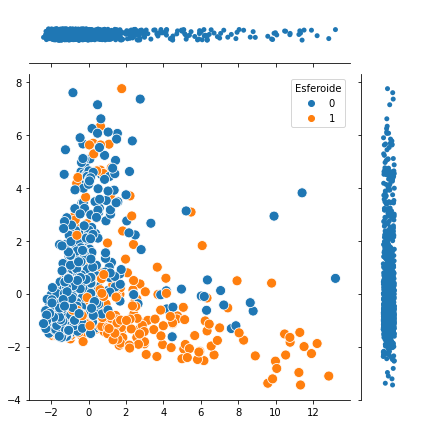

In [52]:
from sklearn.decomposition import PCA
import pandas as pd
import numpy as np
np.random.seed(0)

# Standarization
cols_to_project = ['Area', 
                         'Perim.',
                         #'Width',
                         #'Height',
                         'Circ.',
                         'Feret',
                         'MinFeret',
                         'AR',
                         'Round',
                         'Solidity',
                         #'Esferoide',
                         'Diameter',
                         'n_diam']

df_standard = fiji_datos_encoded[cols_to_project].copy()

# Standardize the data
df_standard = (df_standard - df_standard.mean()) / df_standard.std()
pca = PCA(n_components=10)
pca.fit(df_standard)

print(f'Principal components {pca.components_[0]}')
print(f'Explained variance: {pca.explained_variance_}')
print(f'Explained variance ratio: {pca.explained_variance_ratio_}')

import seaborn as sns
import matplotlib.pyplot as plt

df_projected = pca.transform(df_standard)

g = sns.JointGrid(x=df_projected[:, 0], y=df_projected[:, 1],hue=fiji_datos_encoded['Esferoide'], height=6)
g.plot_joint(sns.scatterplot, s=100)
g.plot_marginals(sns.stripplot)
plt.show()    



Se observa que los dos componentes principales explican más del 90% de la varianza (59,3 y 32,2 para los componentes 1 y 2, respectivamente), el tercer componente principal afecta la varianza con un orden de magnitud menor. Por lo tanto, se decide elegir los dos primeros componentes para ser agregados al set de datos.
  

In [53]:
# Creación del nuevo nuevo df con los componentes principales agregados en nuevas columnas 
fiji_datos_encoded['pc1'] = df_projected[:, 0]
fiji_datos_encoded['pc2'] = df_projected[:, 1]

fiji_datos_encoded.head()

,labels,Area,X,Y,XM,YM,Perim.,BX,BY,Width,...,AR,Round,Solidity,Esferoide,dia,Diameter,n_diam,Width_1,pc1,pc2
0,Esferas_BT474_dia_0_well_2_100X_1_blob_34,315.6752,1027.9715,694.7215,1027.9715,694.7215,65.6036,1017.6630,684.7826,20.3804,...,1.0130,0.9871,0.9513,1,0,20.87415,1.473866,20.3804,-1.804907,-1.260129
1,Esferas_BT474_dia_0_well_1_100X_1_blob_8,333.6742,1123.7169,318.7621,1123.7169,318.7621,67.3603,1112.7717,309.1033,21.7391,...,1.0531,0.9496,0.9557,1,0,20.80470,1.459204,21.7391,-1.781630,-1.135276
2,Esferas_BT474_dia_0_well_2_100X_1_blob_3,505.3572,1649.6734,26.9633,1649.6734,26.9633,85.2847,1636.5489,14.2663,25.8152,...,1.0173,0.9830,0.9387,1,0,26.85360,3.137900,25.8152,-1.354712,-0.830658
3,Esferas_BT474_dia_0_well_2_100X_1_blob_8,874.1065,1596.3056,145.1846,1596.3056,145.1846,130.8776,1583.5598,123.6413,25.8152,...,1.9705,0.5075,0.8983,0,0,35.42365,7.202967,25.8152,0.067367,4.471457
4,Esferas_BT474_dia_0_well_2_100X_1_blob_23,302.7528,130.9940,453.8447,130.9940,453.8447,64.4780,121.6033,443.6141,19.0217,...,1.0803,0.9256,0.9473,1,0,20.30050,1.355663,19.0217,-1.781918,-0.799000


##### $5.$ Pueden identificar sesgos en la toma de los datos o en el etiquetado? Si les parece que es así, cómo sería un experimento o método para mejorarlos?

In [54]:
#

##### $6.$ Realizar una documentación técnica de los procesos realizados.

In [55]:
#



### OPCIONAL

7) Explorar la carpeta *py_folder*. El archivo *main.py* es solo un borrador. Agregar alguna función de transformación en el módulo de eda y que puedan ejecutarla corriendo el archivo.

 Para correr el archivo main, en una terminal:

    (.venv) $ python main.py

 [Pdoc](https://pdoc.dev/) es una elección común para la documentación en Python. Para usarlo en este proyecto (está un poco personalizado):

    1) Instalarlo:
       (.venv) $ pip install pdoc
    2) Crear la carpeta con la documentación
       (.venv) $ pdoc main.py utils/ -o ./documentacion/Docs -t ./documentacion/pdoc_templates/
